In [0]:
!pip install qiskit

     |████████████████████████████████| 1.5MB 4.9MB/s 
     |████████████████████████████████| 23.8MB 1.3MB/s 
     |████████████████████████████████| 40kB 13.2MB/s 
     |████████████████████████████████| 81kB 21.8MB/s 
     |████████████████████████████████| 409kB 37.5MB/s 
     |████████████████████████████████| 522kB 36.3MB/s 
     |████████████████████████████████| 51kB 19.5MB/s 
     |████████████████████████████████| 5.3MB 21.0MB/s 
     |████████████████████████████████| 51kB 19.4MB/s 
     |████████████████████████████████| 51kB 18.3MB/s 
     |████████████████████████████████| 71kB 23.8MB/s 
     |████████████████████████████████| 501kB 34.9MB/s 
     |████████████████████████████████| 481kB 21.0MB/s 
     |████████████████████████████████| 21.4MB 26.6MB/s 
     |████████████████████████████████| 2.3MB 39.3MB/s 
     |████████████████████████████████| 61kB 21.5MB/s 
     |████████████████████████████████| 61kB 22.1MB/s 
     |████████████████████████████████| 102kB 27.3MB/s 


In [0]:
# Import Aer
from qiskit import BasicAer

# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('statevector_simulator')

In [0]:
import numpy as np
from qiskit import *
%matplotlib inline

In [0]:
# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2, 'q')

# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q)

In [0]:
# Add a H gate on qubit 0,1 putting this qubit in superposition.
circ.h(q[0])
circ.h(q[1])
# The Oracle
circ.h(q[1])
circ.cx(q[0], q[1])
circ.h(q[1])
# Amplify
circ.h(q[1])
circ.h(q[0])
circ.x(q[0])
circ.x(q[1])
# The Oracle
circ.h(q[1])
circ.cx(q[0], q[1])
circ.h(q[1])
# Amplify
circ.x(q[0])
circ.x(q[1])
circ.h(q[0])
circ.h(q[1])

In [0]:
circ.draw()

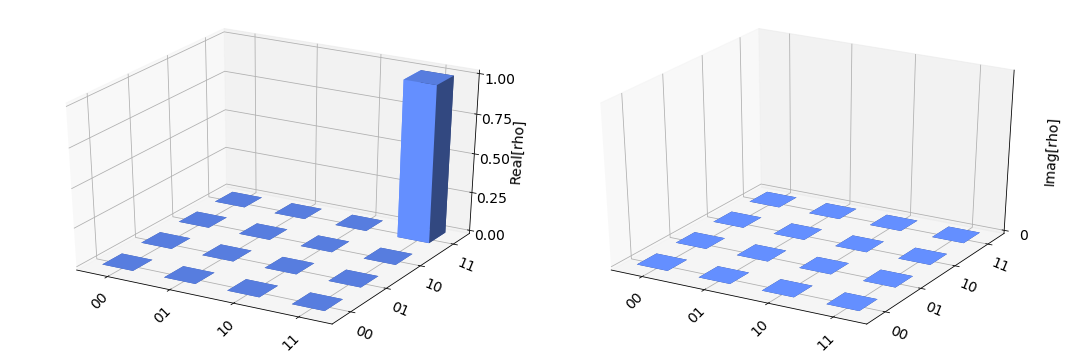

In [0]:
# Create a Quantum Program for execution 
job = execute(circ, backend)

result = job.result()
outputstate = result.get_statevector(circ, decimals=3)

from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [0]:
# Create a Classical Register with 2 bits.
c = ClassicalRegister(2, 'c')

# Create a Quantum Circuit
meas = QuantumCircuit(q, c)

In [0]:
# map the quantum measurement to the classical bits
meas.measure(q,c)

In [0]:
# Add Measurement to circuit
qc = circ+meas

#drawing the circuit
qc.draw()

In [0]:
# Use Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)
print(counts)

{'11': 1024}


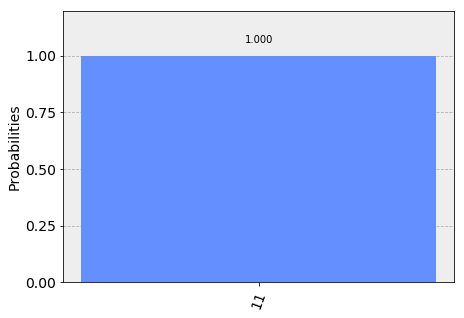

In [0]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)